In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
sns.set_style({'axes_labelcolor': 'white'})

In [6]:
x = pd.read_csv("C:/Users/Ian/Box Sync/Client/Baker Tilly/201901 ProdDev Initiative/"
                "2 - Work in Process/POIS-0202-Moixa/Data/scoredTrainingData.csv")

In [7]:
x

,UNIQUE_ID,Overall_Rating,Technical_Skills,Teamwork,Customer_Service,Hire_Again,High_Performer,Protected_Group,Retained,SJ_Most_1,...,average_S4,average_S5,average_S6,average_S7,average_S8,average_S9,average_S10,average_S11,average_S12,average_S13
0,245021089,3.0,3.0,4.0,4.0,4.0,0.0,0.0,1.0,3.0,...,1.50,3.75,4.25,2.00,3.25,1.00,1.00,1.00,1.25,2.25
1,245181465,5.0,5.0,5.0,5.0,5.0,1.0,1.0,0.0,3.0,...,1.00,3.25,3.75,1.00,2.25,1.00,1.00,1.00,1.00,2.25
2,229682665,3.0,3.0,3.0,3.0,4.0,0.0,1.0,0.0,2.0,...,2.50,1.75,4.50,1.00,1.00,1.00,1.00,2.50,1.00,2.00
3,245174982,4.0,4.0,4.0,4.0,5.0,1.0,0.0,1.0,2.0,...,2.00,3.00,3.75,1.00,2.00,1.00,2.00,2.25,1.50,2.25
4,244979030,2.0,2.0,3.0,2.0,3.0,0.0,0.0,1.0,3.0,...,3.25,4.00,5.00,2.00,2.00,1.00,2.50,4.00,1.25,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44097,245134525,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,3.0,...,2.25,3.75,4.50,1.75,2.25,1.00,1.00,1.00,1.25,1.50
44098,245037228,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,...,2.25,4.00,5.00,2.00,3.75,1.25,1.00,1.50,1.25,2.00
44099,245060408,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,3.0,...,1.00,4.00,6.00,1.00,4.00,1.00,1.00,1.00,1.00,1.25
44100,244967647,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.75,1.00,5.50,1.00,2.50,1.00,1.00,2.00,1.00,2.00


In [8]:
def Corr(feat_regx):
    df = x.filter(regex="{}.*".format(feat_regx), axis=1)
    data_corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
def performanceCorr(feat_regx):
    df1 = x.filter(regex="{}.*".format(feat_regx), axis=1)
    df = x[list(x.columns)[1:8]].join(df1)
    data_corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

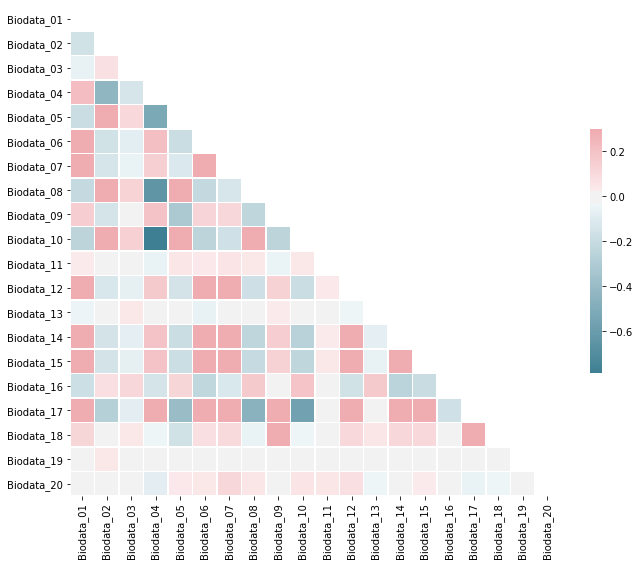

In [10]:
Corr('Biodata')

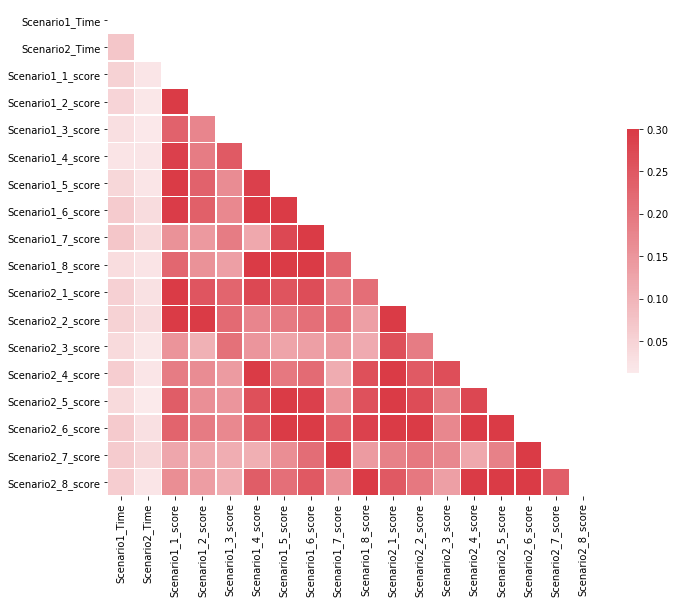

In [11]:
Corr('Scenario')

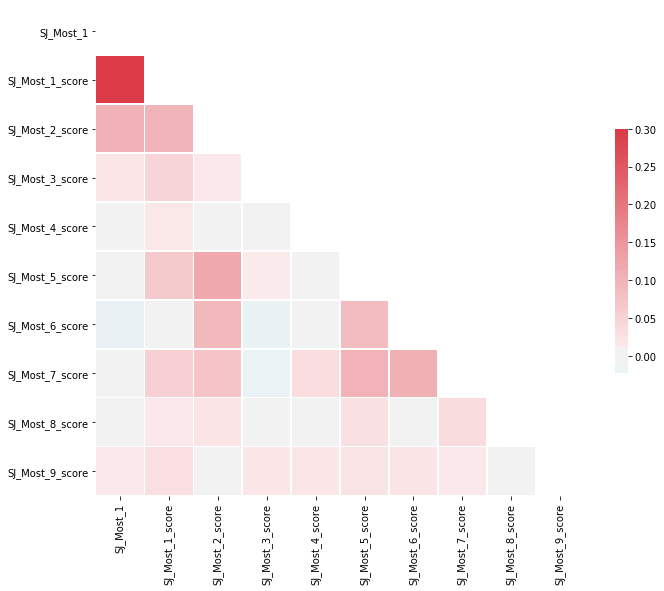

In [12]:
Corr('SJ_Most')

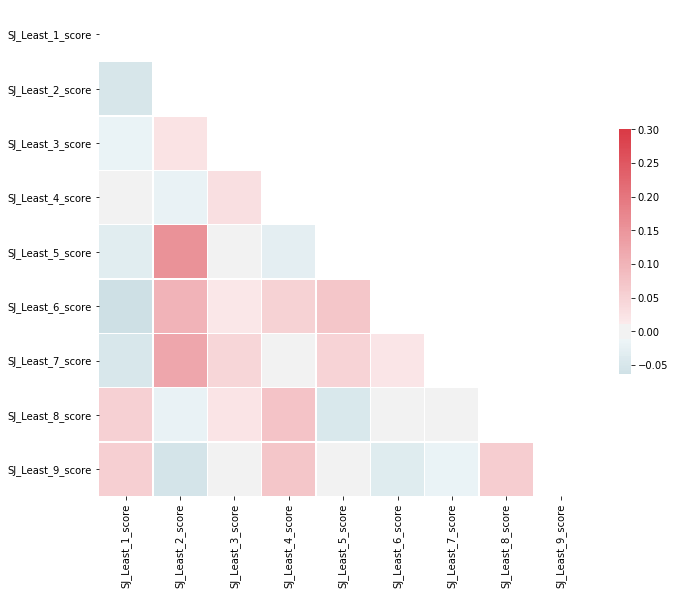

In [13]:
Corr('SJ_Least')

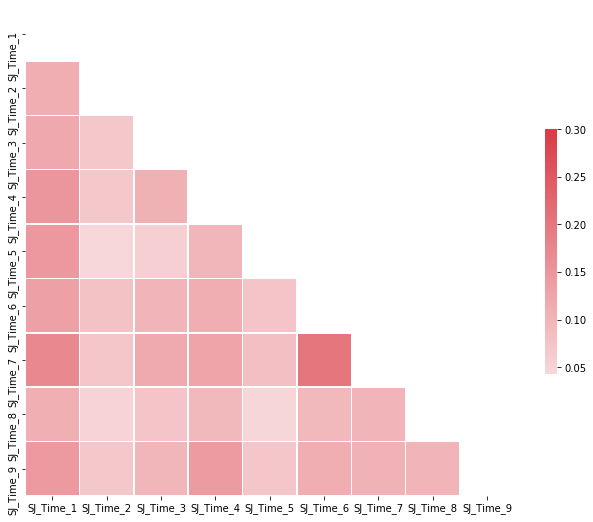

In [14]:
Corr('SJ_Time')

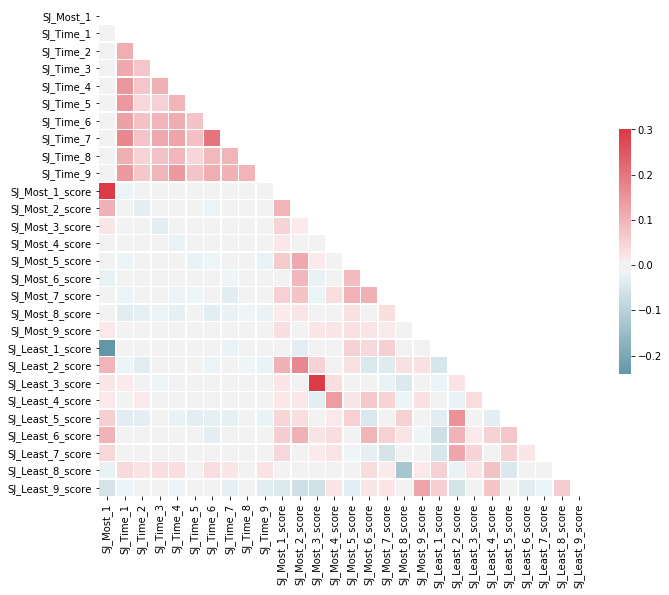

In [15]:
Corr('SJ_')

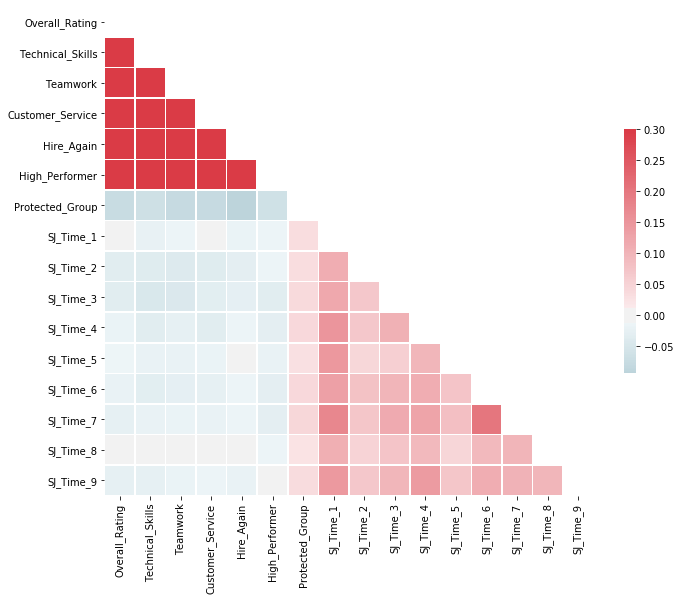

In [16]:
performanceCorr('SJ_Time')

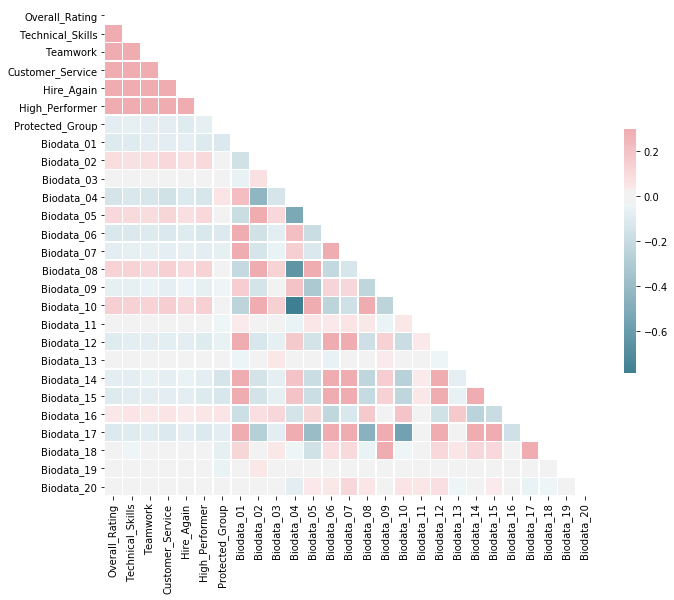

In [17]:
performanceCorr('Biodata')

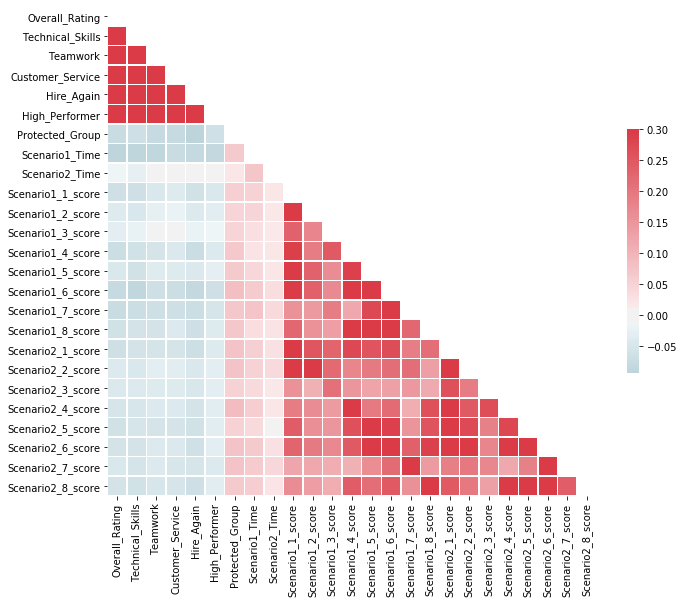

In [18]:
performanceCorr('Scenario')

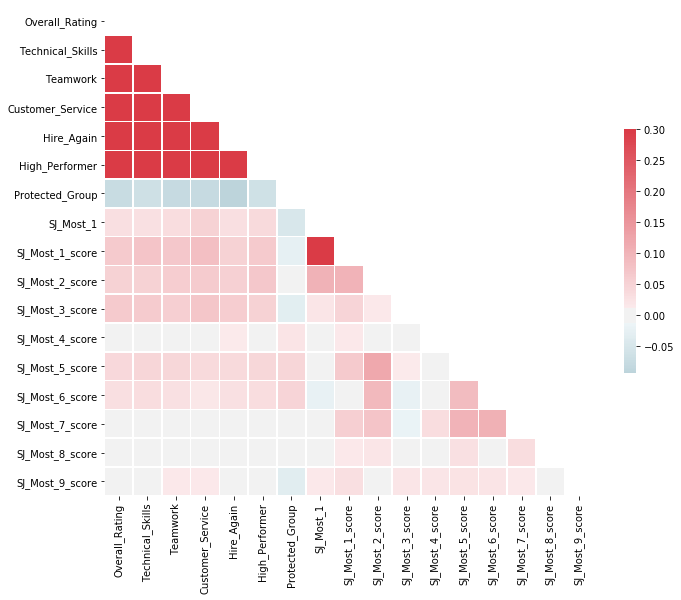

In [19]:
performanceCorr('SJ_Most')

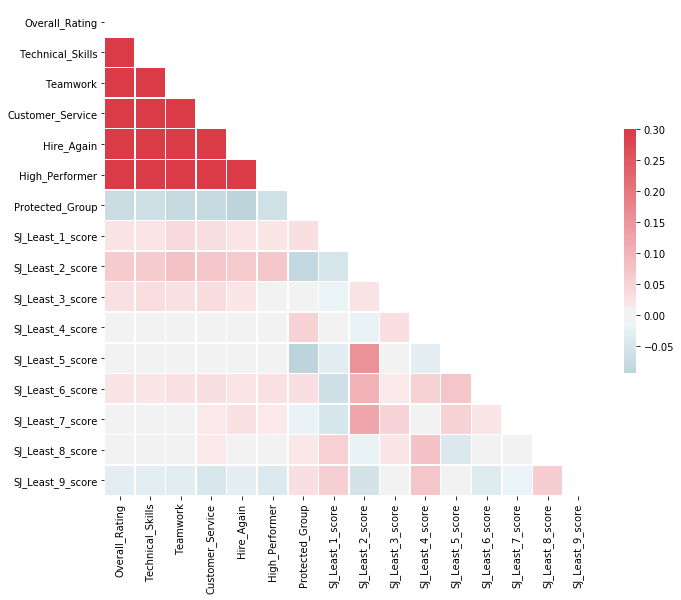

In [20]:
performanceCorr('SJ_Least')

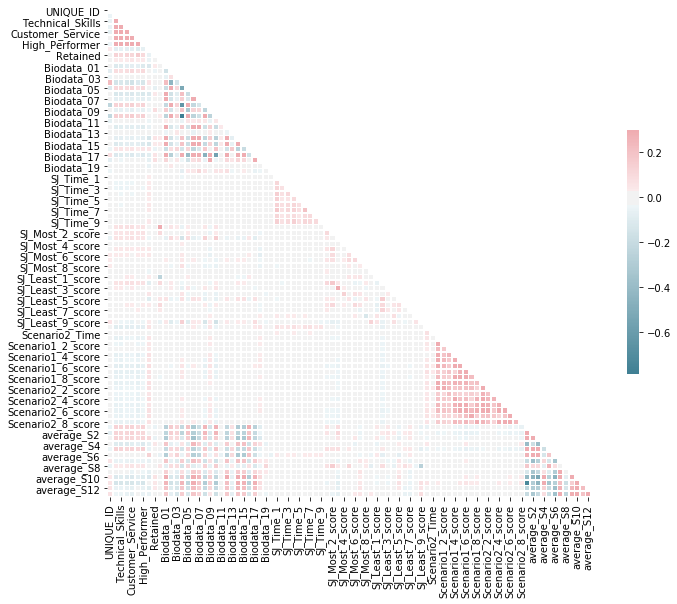

In [21]:
x.corr()
data_corr = x.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
def clusterWCSS(feat_regx, n_clusters):
    df = x.filter(regex="{}.*".format(feat_regx), axis=1)
    print(df)
    wcss = []
    for i in range(1, n_clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, n_jobs=8)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, n_clusters), wcss)
    plt.title('Elbow Graph')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

In [23]:
def clustering(feat_regx, n_clusters):
    df = x.filter(regex="{}.*".format(feat_regx), axis=1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, n_jobs=8)
    kmeans.fit(df)
    pred = kmeans.predict(df)
    print(pred)
    return pred

       Biodata_01  Biodata_02  Biodata_03  Biodata_04  Biodata_05  Biodata_06  \
0             2.0         3.0         2.0         2.0         2.0         1.0   
1             2.0         5.0         5.0         2.0         3.0         1.0   
2             2.0         3.0         1.0         1.0         2.0         2.0   
3             2.0         1.0         2.0         7.0         1.0         1.0   
4             3.0         1.0         6.0         6.0         1.0         3.0   
...           ...         ...         ...         ...         ...         ...   
44097         2.0         1.0         3.0         7.0         1.0         1.0   
44098         1.0         7.0         5.0         1.0         2.0         1.0   
44099         1.0         5.0         5.0         5.0         2.0         1.0   
44100         2.0         7.0         3.0         1.0         1.0         2.0   
44101         2.0         4.0         5.0         6.0         2.0         1.0   

       Biodata_07  Biodata_

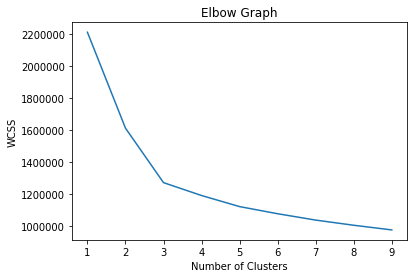

In [24]:
clusterWCSS('Biodata', 10)

In [25]:
clusters = clustering('Biodata', 3)

[0 0 0 ... 0 0 1]


In [26]:
clusters

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
test = x.filter(regex='Biodata.*', axis=1)
test['cluster'] = clusters

C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
test.groupby('cluster').mean().T

cluster,0,1,2
Biodata_01,1.809514,2.054643,2.526002
Biodata_02,4.051537,2.864871,2.147045
Biodata_03,4.105683,3.556446,3.605866
Biodata_04,1.844437,4.928972,6.873834
Biodata_05,2.010942,1.605245,1.041580
Biodata_06,1.700462,2.029638,2.397446
Biodata_07,1.781289,1.930911,2.329076
Biodata_08,6.176214,2.398760,1.086249
Biodata_09,3.631049,2.094740,6.922869
Biodata_10,5.667615,2.931976,1.228349


In [29]:
test.groupby('cluster').count().T

cluster,0,1,2
Biodata_01,18788,15694,9620
Biodata_02,18788,15694,9620
Biodata_03,18788,15694,9620
Biodata_04,18788,15694,9620
Biodata_05,18788,15694,9620
Biodata_06,18788,15694,9620
Biodata_07,18788,15694,9620
Biodata_08,18788,15694,9620
Biodata_09,18788,15694,9620
Biodata_10,18788,15694,9620


       Scenario1_1_score  Scenario1_2_score  Scenario1_3_score  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                1.0                0.0   
...                  ...                ...                ...   
44097                0.0                0.0                0.0   
44098                0.0                0.0                0.0   
44099                0.0                0.0                0.0   
44100                0.0                0.0                0.0   
44101                0.0                0.0                0.0   

       Scenario1_4_score  Scenario1_5_score  Scenario1_6_score  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2        

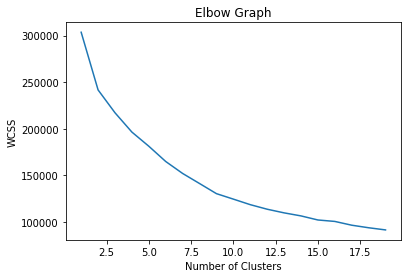

In [30]:
clusterWCSS('Scenario\d_\d_score', 20)

In [31]:
clusters2 = clustering('Scenario\d_\d_score', 10)

[0 0 8 ... 0 0 0]


In [32]:
clusters2

array([0, 0, 8, ..., 0, 0, 0])

In [33]:
test2 = x.filter(regex='Scenario\d_\d_score', axis=1)
test2['cluster'] = clusters2

C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
test2.groupby('cluster').mean().T

cluster,0,1,2,3,4,5,6,7,8,9
Scenario1_1_score,0.028415,0.307647,0.804233,0.669435,0.141261,0.105374,1.105769,0.073602,0.116119,0.091941
Scenario1_2_score,0.057339,0.313789,1.312169,0.559801,0.218675,0.180190,1.346154,0.102061,0.220328,0.159150
Scenario1_3_score,0.006904,1.005264,1.351852,0.945183,4.067837,0.221286,4.403846,0.093229,0.034620,0.155368
Scenario1_4_score,0.003500,4.387630,1.063492,2.526578,0.042298,0.068493,2.355769,0.031403,0.010917,0.148676
Scenario1_5_score,0.003993,0.312619,0.425926,0.813953,0.079808,0.342466,1.105769,0.054956,0.469613,0.164969
Scenario1_6_score,0.022904,0.694254,0.936508,1.514950,0.198723,0.928346,1.913462,0.175662,1.460739,0.542042
Scenario1_7_score,0.022419,0.357508,0.484127,0.370432,0.234637,1.065332,6.384615,0.182532,1.471890,0.507710
Scenario1_8_score,0.005574,1.048399,0.907407,2.549834,0.035116,4.293994,1.653846,0.049068,0.014128,0.779459
Scenario2_1_score,0.030588,0.125896,3.685185,2.488372,0.140463,0.099052,3.778846,0.235525,0.120556,0.305499
Scenario2_2_score,0.022825,0.110542,7.407407,0.651163,0.109338,0.093783,5.355769,0.209028,0.140989,0.224033


In [35]:
test2.groupby('cluster').count().T

cluster,0,1,2,3,4,5,6,7,8,9
Scenario1_1_score,35882,977,378,602,1253,949,104,1019,2447,491
Scenario1_2_score,35882,977,378,602,1253,949,104,1019,2447,491
Scenario1_3_score,35882,977,378,602,1253,949,104,1019,2447,491
Scenario1_4_score,35882,977,378,602,1253,949,104,1019,2447,491
Scenario1_5_score,35882,977,378,602,1253,949,104,1019,2447,491
Scenario1_6_score,35882,977,378,602,1253,949,104,1019,2447,491
Scenario1_7_score,35882,977,378,602,1253,949,104,1019,2447,491
Scenario1_8_score,35882,977,378,602,1253,949,104,1019,2447,491
Scenario2_1_score,35882,977,378,602,1253,949,104,1019,2447,491
Scenario2_2_score,35882,977,378,602,1253,949,104,1019,2447,491


In [36]:
corr2 = pd.DataFrame(clusters2).join(pd.DataFrame(x[['Protected_Group', 'Retained']]))

In [37]:
corr2

,0,Protected_Group,Retained
0,0,0.0,1.0
1,0,1.0,0.0
2,8,1.0,0.0
3,0,0.0,1.0
4,0,0.0,1.0
...,...,...,...
44097,0,0.0,1.0
44098,0,0.0,0.0
44099,0,1.0,0.0
44100,0,1.0,1.0


In [38]:
corr2.head(20)

,0,Protected_Group,Retained
0,0,0.0,1.0
1,0,1.0,0.0
2,8,1.0,0.0
3,0,0.0,1.0
4,0,0.0,1.0
5,0,1.0,1.0
6,0,0.0,1.0
7,0,1.0,1.0
8,0,0.0,1.0
9,1,0.0,0.0


In [39]:
corr2.groupby(['Protected_Group', 'Retained']).sum()

0
Protected_Group Retained       
0.0             0.0       13177
                1.0       13720
1.0             0.0        9927
                1.0        8216

In [40]:
pd.crosstab(corr2[0], corr2['Protected_Group'])

Protected_Group,0.0,1.0
0,,
0,25429,10447
1,550,427
2,186,192
3,288,314
4,813,440
5,561,388
6,40,64
7,651,368
8,1493,953


In [41]:
x[['Protected_Group', 'Retained', 'High_Performer', 'Scenario1_Time']].\
    groupby(['Protected_Group', 'Retained', 'High_Performer']).mean()


Scenario1_Time
Protected_Group Retained High_Performer                
0.0             0.0      0.0                  68.159938
                         1.0                  60.320000
                1.0      0.0                  70.587234
                         1.0                  63.801931
1.0             0.0      0.0                  77.507625
                         1.0                  70.206349
                1.0      0.0                  83.174273
                         1.0                  68.945418

In [42]:
x[['Protected_Group', 'Retained', 'High_Performer', 'Scenario2_Time']].\
    groupby(['Protected_Group', 'Retained', 'High_Performer']).mean()

Scenario2_Time
Protected_Group Retained High_Performer                
0.0             0.0      0.0                  63.458851
                         1.0                  56.697333
                1.0      0.0                  65.756926
                         1.0                  76.040411
1.0             0.0      0.0                  77.244009
                         1.0                  68.272487
                1.0      0.0                  83.818381
                         1.0                  65.612758

In [43]:
x[['Protected_Group', 'Retained', 'High_Performer', 'Scenario1_Time']].\
    groupby(['Protected_Group', 'Retained', 'High_Performer']).median()

Scenario1_Time
Protected_Group Retained High_Performer                
0.0             0.0      0.0                       54.0
                         1.0                       51.0
                1.0      0.0                       58.0
                         1.0                       52.0
1.0             0.0      0.0                       62.0
                         1.0                       57.0
                1.0      0.0                       65.0
                         1.0                       56.0

In [44]:
x[['Protected_Group', 'Retained', 'High_Performer', 'Scenario2_Time']].\
    groupby(['Protected_Group', 'Retained', 'High_Performer']).median()

Scenario2_Time
Protected_Group Retained High_Performer                
0.0             0.0      0.0                       49.5
                         1.0                       46.0
                1.0      0.0                       52.0
                         1.0                       47.0
1.0             0.0      0.0                       58.0
                         1.0                       52.5
                1.0      0.0                       63.0
                         1.0                       55.0

In [45]:
x[['Protected_Group', 'Retained', 'High_Performer', 'Scenario1_Time']].\
    groupby(['Protected_Group', 'Retained', 'High_Performer']).count()


Scenario1_Time
Protected_Group Retained High_Performer                
0.0             0.0      0.0                       1288
                         1.0                        750
                1.0      0.0                       1645
                         1.0                       1361
1.0             0.0      0.0                        918
                         1.0                        378
                1.0      0.0                        914
                         1.0                        636

In [46]:
x[['Protected_Group', 'Retained', 'High_Performer', 'Scenario2_Time']].\
    groupby(['Protected_Group', 'Retained', 'High_Performer']).count()

Scenario2_Time
Protected_Group Retained High_Performer                
0.0             0.0      0.0                       1288
                         1.0                        750
                1.0      0.0                       1645
                         1.0                       1361
1.0             0.0      0.0                        918
                         1.0                        378
                1.0      0.0                        914
                         1.0                        636

In [47]:
x[['Protected_Group', 'Retained', 'Scenario1_Time']].\
    groupby(['Protected_Group', 'Retained']).mean()

Scenario1_Time
Protected_Group Retained                
0.0             0.0            66.173785
                1.0            68.784975
1.0             0.0            77.338187
                1.0            83.907787

In [48]:
x[['Protected_Group', 'Retained', 'Scenario2_Time']].\
    groupby(['Protected_Group', 'Retained']).mean()

Scenario2_Time
Protected_Group Retained                
0.0             0.0            63.023285
                1.0            69.469154
1.0             0.0            77.003819
                1.0            79.134562

In [49]:
x[['Protected_Group', 'Retained', 'Scenario1_Time']].\
    groupby(['Protected_Group', 'Retained']).median()

Scenario1_Time
Protected_Group Retained                
0.0             0.0                 53.0
                1.0                 55.0
1.0             0.0                 61.0
                1.0                 64.0

In [50]:
x[['Protected_Group', 'Retained', 'Scenario2_Time']].\
    groupby(['Protected_Group', 'Retained']).median()

Scenario2_Time
Protected_Group Retained                
0.0             0.0                 48.5
                1.0                 50.0
1.0             0.0                 57.0
                1.0                 59.0

In [51]:
x[['Protected_Group', 'Retained', 'Scenario1_Time']].\
    groupby(['Protected_Group', 'Retained']).count()

Scenario1_Time
Protected_Group Retained                
0.0             0.0                14804
                1.0                15464
1.0             0.0                 7593
                1.0                 6234

In [52]:
x[['Protected_Group', 'Retained', 'Scenario2_Time']].\
    groupby(['Protected_Group', 'Retained']).count()

Scenario2_Time
Protected_Group Retained                
0.0             0.0                14804
                1.0                15464
1.0             0.0                 7593
                1.0                 6234

In [74]:
def summary(id_list, metric):
    print(id_list)
    data = x[id_list]
    # print(data.head(5))


In [88]:
c = x.filter(regex='SJ_Time_.*')
metrics = list(c.columns)

In [92]:
for metric in metrics:
    id1 = ['Protected_Group', 'Retained']
    l = ['Protected_Group', 'Retained', metric]
    data = x[l]
    means = data.groupby(id1).mean()
    medians = data.groupby(id1).median()
    counts = data.groupby(id1).count()
    print('Count {}'.format(metric))
    print(counts)
    print('Mean {}'.format(metric))
    print(means)
    print('Median {}'.format(metric))
    print(medians)

Count SJ_Time_1
                          SJ_Time_1
Protected_Group Retained           
0.0             0.0           14804
                1.0           15464
1.0             0.0            7593
                1.0            6234
Mean SJ_Time_1
                          SJ_Time_1
Protected_Group Retained           
0.0             0.0       68.870778
                1.0       68.773428
1.0             0.0       74.086790
                1.0       77.934484
Median SJ_Time_1
                          SJ_Time_1
Protected_Group Retained           
0.0             0.0            53.0
                1.0            56.0
1.0             0.0            57.0
                1.0            60.0
Count SJ_Time_2
                          SJ_Time_2
Protected_Group Retained           
0.0             0.0           14804
                1.0           15464
1.0             0.0            7593
                1.0            6234
Mean SJ_Time_2
                          SJ_Time_2
Protected_Group Retai